**Task 5: Analyze and Visualize Sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
twitter_training = pd.read_csv('twitter_training.csv')
twitter_validation = pd.read_csv('twitter_validation.csv')

twitter_training.head()
twitter_validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [3]:
columns=['TweetID','entity', 'sentiment', 'Tweet content']

twitter_training = pd.read_csv('twitter_training.csv', header= None, names=columns)

twitter_validation = pd.read_csv('twitter_validation.csv', header= None, names=columns)

In [4]:
twitter_training.head()

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
twitter_validation.head()

,TweetID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
twitter_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
twitter_training.isna().sum()

TweetID            0
entity             0
sentiment          0
Tweet content    686
dtype: int64

In [8]:
twitter_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   Tweet content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [9]:
twitter_validation.duplicated().sum()

0

In [10]:
twitter_training = twitter_training.drop_duplicates()

In [11]:
twitter_training = twitter_training.dropna()

In [12]:
twitter_training.iloc[:, 2].value_counts()

sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [13]:
twitter_validation.iloc[:, 2].value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [14]:
twitter_training['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

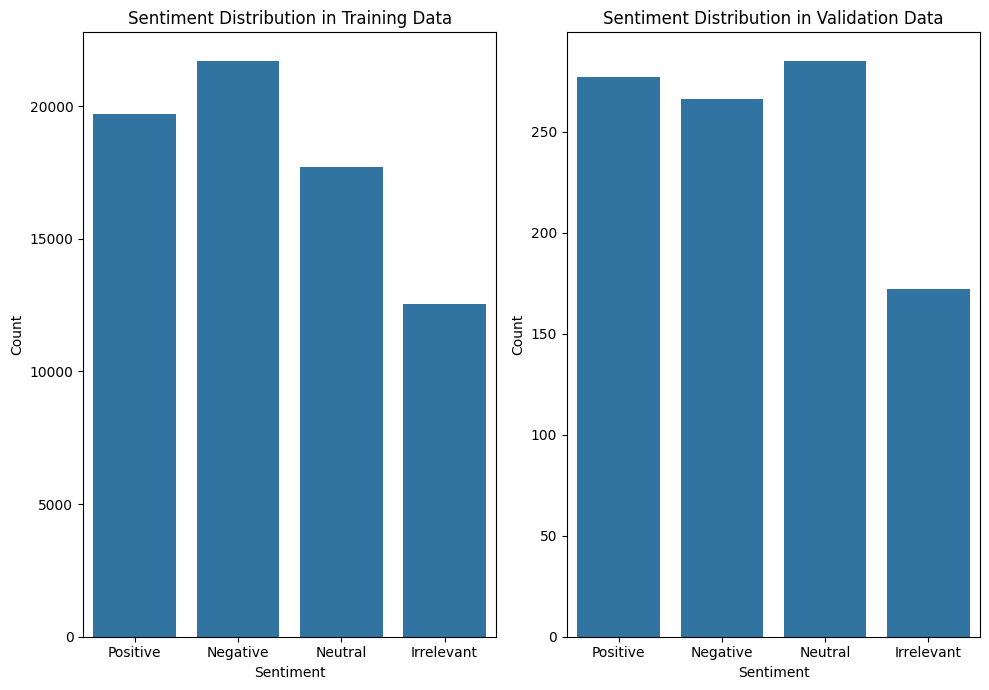

In [15]:
#Setting up the plots

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

#Plotting sentiment distribution for training data

sns.countplot(data=twitter_training, x=twitter_training.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data'), ax [0].set_ylabel('Count')
ax [0].set_xlabel('Sentiment')

#Plotting sentiment distribution for validation data

sns.countplot(data=twitter_validation, x=twitter_validation.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])

ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()

plt.show()

C:\Users\Harshal\AppData\Local\Temp\ipykernel_19872\1229242748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter_training, y=twitter_training.columns[1], palette='icefire')


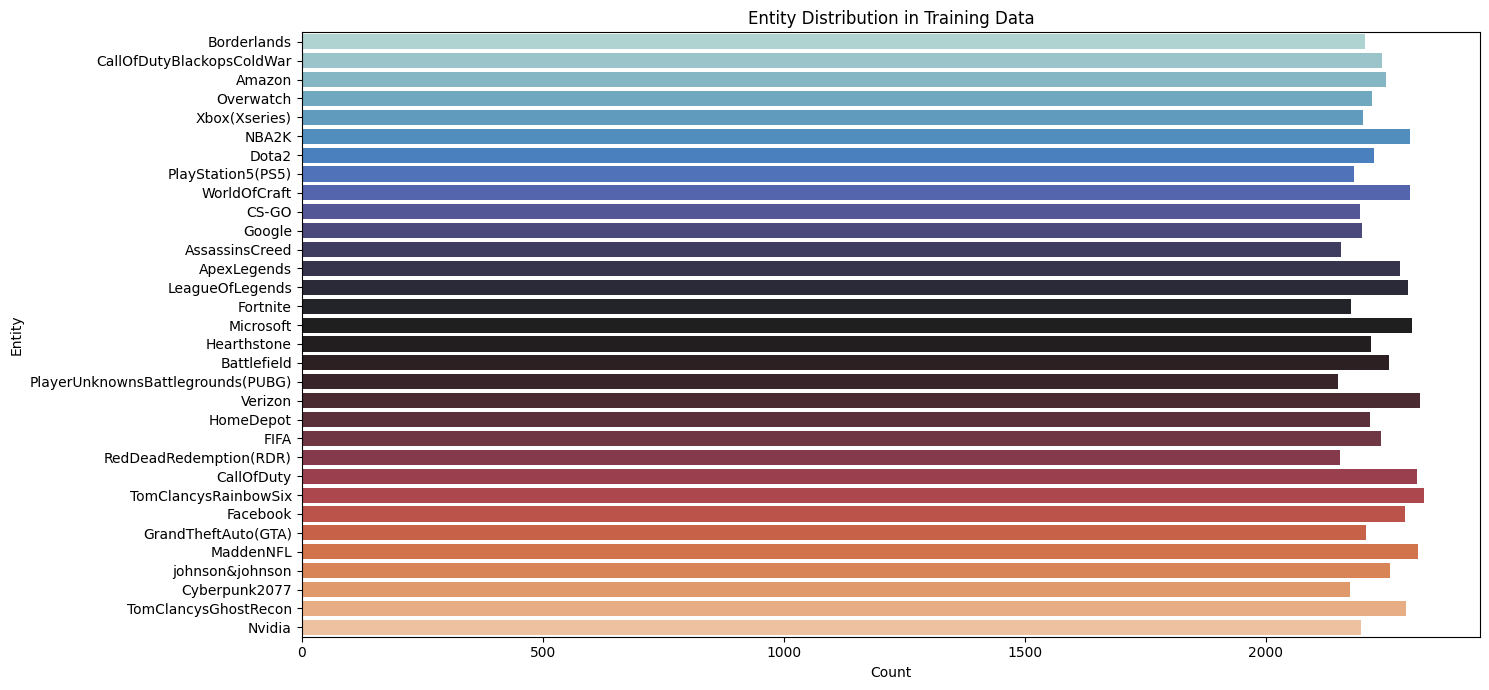

In [16]:
# Setting up the plot

plt.figure(figsize=(15, 7))

#Plotting entity distribution for training data

sns.countplot(data=twitter_training, y=twitter_training.columns[1], palette='icefire')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

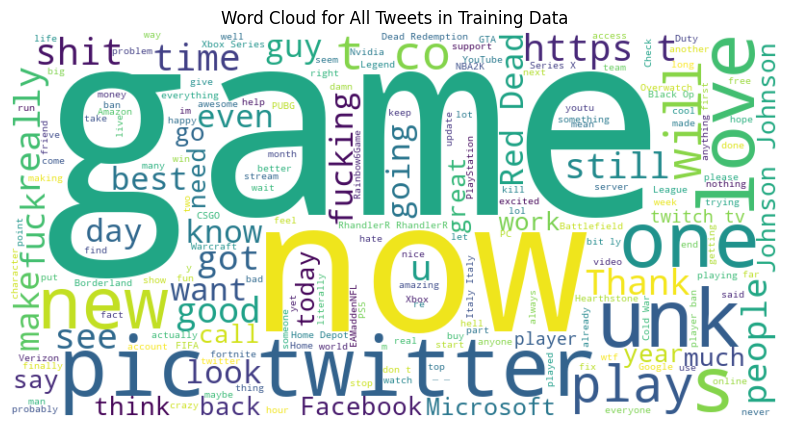

In [17]:
# Generating the word cloud for the entire training dataset

all_text = " ".join(tweet for tweet in twitter_training[twitter_training.columns[3]])
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)

#Plotting the word cloud

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.show()

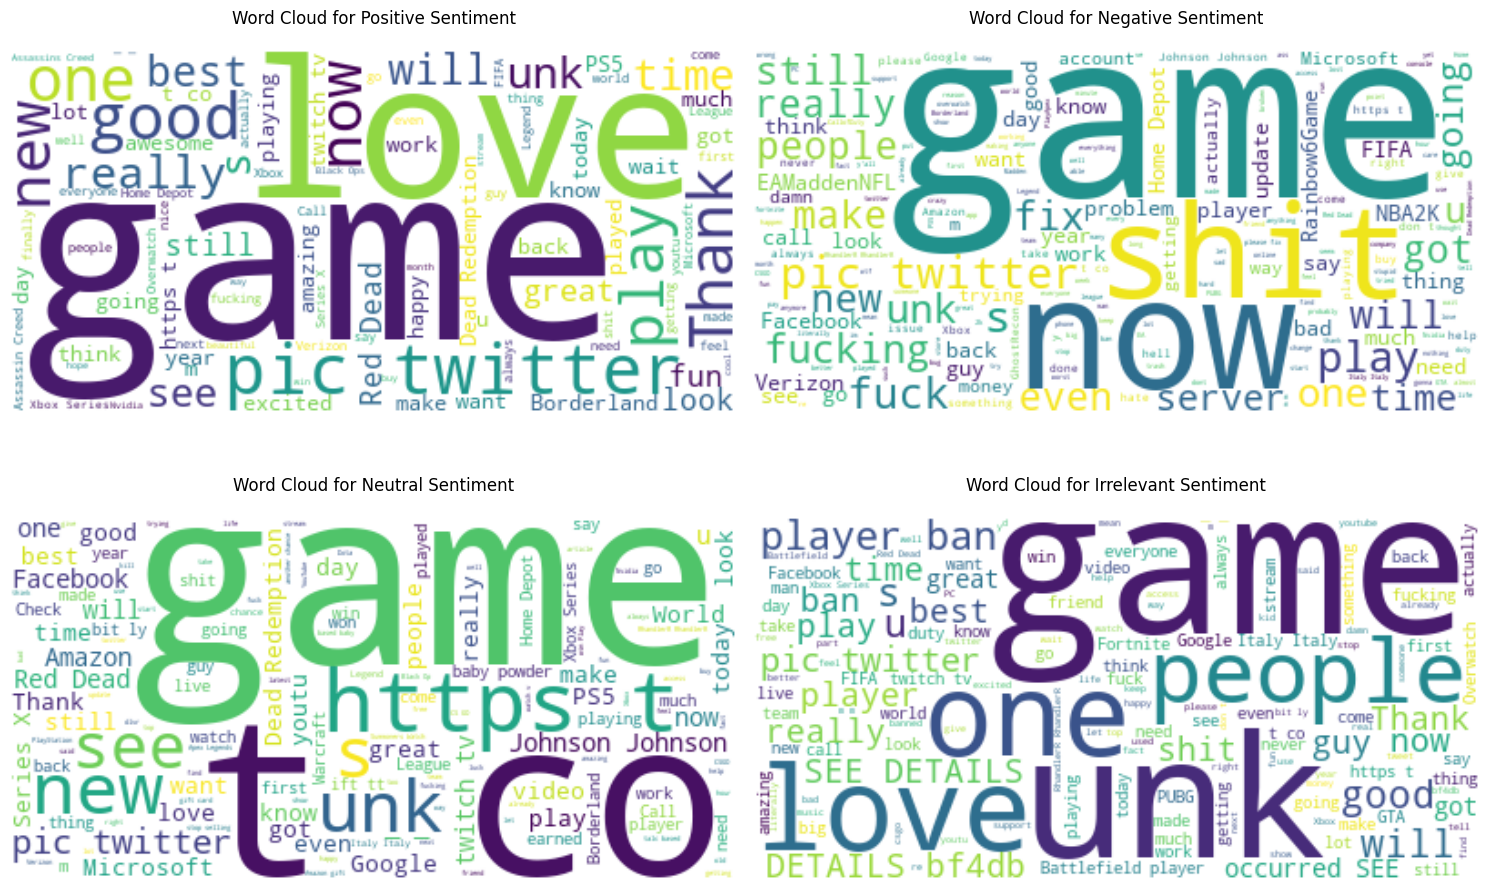

In [18]:
#Initializing sentiment categories

sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

#Setting up the plots

fig, axs= plt.subplots (2, 2, figsize=(15, 10))

#Generating and plotting word clouds for each sentiment

for sentiment, ax in zip(sentiments, axs.ravel()):

    sentiment_text = "".join(tweet for tweet in

    twitter_training [twitter_training [twitter_training.columns[2]] == sentiment] [twitter_training.columns[3]])

    wordcloud_sentiment = WordCloud (background_color='white', width=400, height=200).generate(sentiment_text)

    ax.imshow(wordcloud_sentiment, interpolation='bilinear') 
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment', y=1.05)

plt.tight_layout()

plt.show()

In [19]:
# Alternative function to preprocess text without lemmatization or NLTK stopwords 
def preprocess_text_silplified(text):

    #Converting to lowercase
    text =text.lower()
    #Simple tokenization using split (without relying on NLTK)
    tokens= text.split()
    #Removing special characters and numbers
    tokens = [token for token in tokens if token.isalpha()]
    return " ".join(tokens)

#Applying simplified preprocessing to training data

twitter_training ['processed_message_simplified'] =twitter_training[twitter_training.columns[3]].apply(preprocess_text_silplified)

#Extracting most frequent terms using CountVectorizer with simplified preprocessing

vectorizer_simplified = CountVectorizer(max_features=20)
X_simplified = vectorizer_simplified.fit_transform(twitter_training ['processed_message_simplified'])
frequent_terms_simplified = vectorizer_simplified.get_feature_names_out()

frequent_terms_simplified

array(['and', 'but', 'for', 'game', 'have', 'in', 'is', 'it', 'just',
       'my', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'with',
       'you'], dtype=object)

In [20]:
#Applying simplified preprocessing to the validation data

twitter_validation['processed_message_simplified'] = twitter_validation [twitter_validation.columns[3]].apply (preprocess_text_silplified)

In [21]:
#Adjusting the labels: Convert "Irrelevant" labels to "Neutral"

twitter_training [twitter_training.columns[2]] = twitter_training[twitter_training.columns[2]].replace('Irrelevant', 'Neutral')

twitter_validation [twitter_validation.columns[2]] =twitter_validation[twitter_validation.columns[2]].replace('Irrelevant', 'Neutral')

In [22]:
twitter_training['sentiment'].value_counts()

sentiment
Neutral     30245
Negative    21698
Positive    19713
Name: count, dtype: int64

In [23]:
twitter_validation['sentiment'].value_counts()

sentiment
Neutral     457
Positive    277
Negative    266
Name: count, dtype: int64

In [24]:
#Initializing the TF-IDF vectorizer

tfidf_vectorizer =TfidfVectorizer(max_features=5000) # Limiting to 5000 features for computational efficiency

#Fitting and transforming the preprocessed text from the training data X_train_tfidf = tfidf_vectorizer.

X_train_tfidf =tfidf_vectorizer.fit_transform(twitter_training['processed_message_simplified'])

#Transforming the preprocessed text from the validation data

X_validation_tfidf = tfidf_vectorizer.transform(twitter_validation ['processed_message_simplified'])

#Extracting target labels for training and validation

y_train = twitter_training [twitter_training.columns[2]] 
y_validation = twitter_validation[twitter_validation.columns[2]]

X_train_tfidf.shape, X_validation_tfidf.shape

((71656, 5000), (1000, 5000))

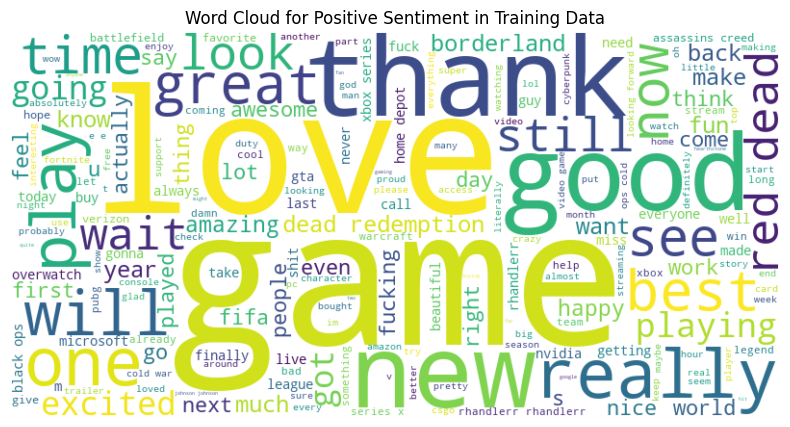

In [25]:
#Extracting text for Positive sentiment from the training dataset

positive_text =" ".join(tweet for tweet in 
                       twitter_training [twitter_training[twitter_training.columns[2]] == 
                       'Positive']['processed_message_simplified'])

#Generating word cloud for Positive sentiment

wordcloud_positive= WordCloud(background_color='white', width=800, height=400).generate(positive_text)

#Plotting the word cloud

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud_positive, interpolation='bilinear')

plt.axis('off')

plt.title('Word Cloud for Positive Sentiment in Training Data')

plt.show()

In [26]:
#The target variable for training and validation again

y_train = twitter_training [twitter_training.columns [2]]
y_validation = twitter_validation [twitter_validation.columns[2]]

#Creating the ML pipeline with TF-IDF vectorization and Logistic Regression

pipeline =Pipeline ([

    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(solver='sag', multi_class='auto', max_iter=10000)) # using 'sag' solver for faster convergence

])

#Training the pipeline model using the training data

pipeline.fit(twitter_training ['processed_message_simplified'], y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(max_iter=10000, solver='sag'))])

In [27]:
# Validating the model's performance on the training dataset

training_accuracy = pipeline.score (twitter_training['processed_message_simplified'], y_train) 
training_accuracy

0.7466506642849168

In [28]:
#Validating the model's performance on the validation dataset

validation_accuracy= pipeline.score(twitter_validation['processed_message_simplified'], y_validation)
validation_accuracy

0.805

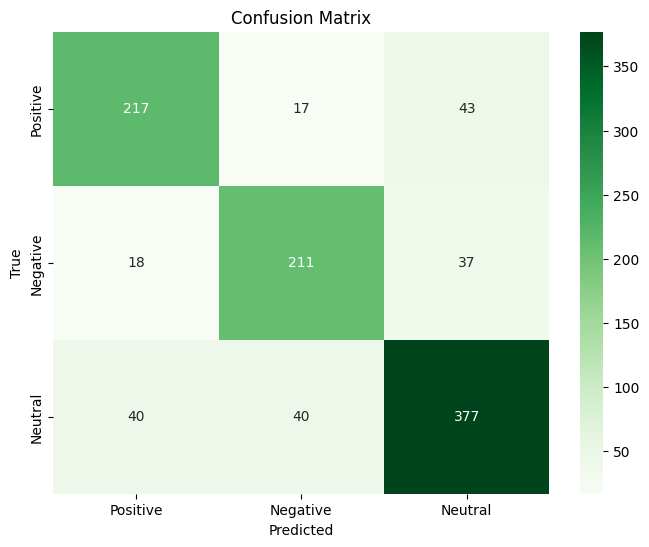

In [29]:
#Generating predictions on the validation data

y_validation_pred= pipeline.predict(twitter_validation['processed_message_simplified'])

#Creating a confusion matrix

conf_matrix = confusion_matrix(y_validation, y_validation_pred, labels=['Positive', 'Negative', 'Neutral'])

#Plotting the confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',

xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])

plt.title('Confusion Matrix')

plt.xlabel('Predicted')

plt.ylabel('True')

plt.show()

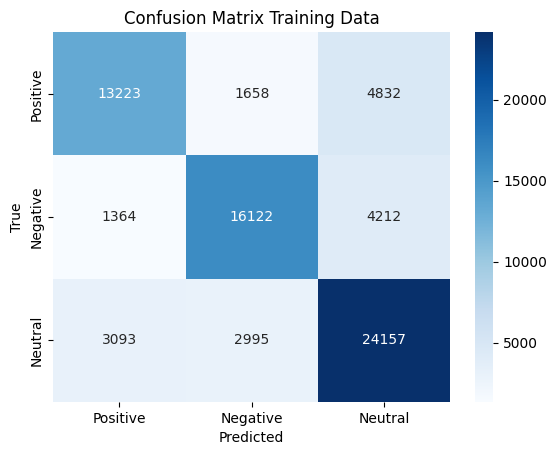

In [30]:
#Generating predictions on the training data

y_train_pred =pipeline.predict(twitter_training['processed_message_simplified'])

#Creating a confusion matrix

conf_matrix_train = confusion_matrix(y_train, y_train_pred, labels=['Positive', 'Negative', 'Neutral'])

#Plotting the confusion matrix plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix Training Data') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()